## A visualization notebook of model's predictions for original images and attacked images

In [30]:
import torch
import numpy as np
import matplotlib.pyplot as plt

import torchvision.transforms.functional as F
from torchvision.utils import make_grid
from torchvision.io import read_image
from pathlib import Path
import os
import json
import copy

import sys
sys.path.append('../visualization/')
from torchvision_utils import draw_segmentation_masks
from visualization_utils import show

In [31]:
EXP_N = 46 # experiment number according to notion page (todo: add synchronization with description)
IMGS_AMOUNT = 3 # amount images to be compared in this notebook

IMGS_AMOUNT = min([10, IMGS_AMOUNT]) # limit IMGS_AMOUNT to prevent unexpected crashes

### Collect data from experiment

In [32]:
path_to_exps = os.path.join('..', 'exps')
path_to_exp = os.path.join(path_to_exps, str(EXP_N))
model_name = [filename for filename in os.listdir(path_to_exp) if filename.endswith('.pt')][0]
# info about attack name and details could be found in run.json file (search for 'UPDATE')
with open(os.path.join(path_to_exp, 'run.json'), 'r') as f:
    run_info = json.load(f)
attack_info = [elem for elem in run_info['meta']['options']['UPDATE'] if elem.startswith("attack.")]

path_to_data = os.path.join(path_to_exps, str(EXP_N), model_name)

data = torch.load(path_to_data)

In [33]:
# convert images from float to uint8
for i in range(len(data['image_names'])):
    data['images'][i] *= 255
    data['images'][i] = data['images'][i][0].to(torch.uint8)

    data['adv_images'][i] *= 255
    data['adv_images'][i] = data['adv_images'][i][0].to(torch.uint8)

    data['preds'][i] = data['preds'][i].to(float)
    data['adv_preds'][i] = data['adv_preds'][i].to(float)

### A visualization of original images (left) and attacked images (right)

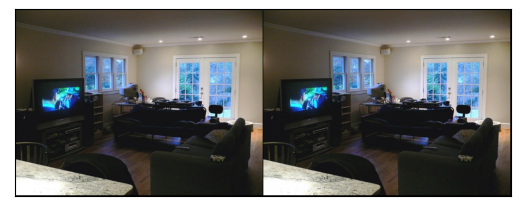

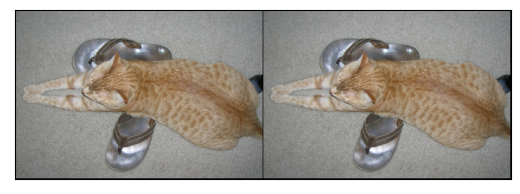

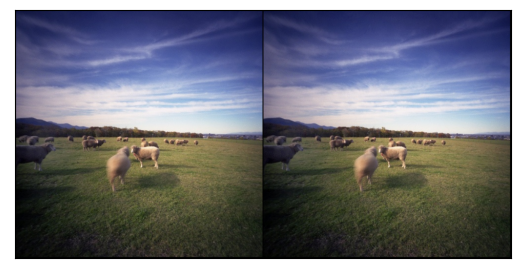

In [34]:
# select idxs of images to be compared
idxs = np.random.choice(len(data['images']), size=IMGS_AMOUNT, replace=False)

for idx in idxs:
    grid = make_grid([data['images'][idx], data['adv_images'][idx]])
    show(grid)

### A visualization of predictions for original images (left) and attacked images (right)

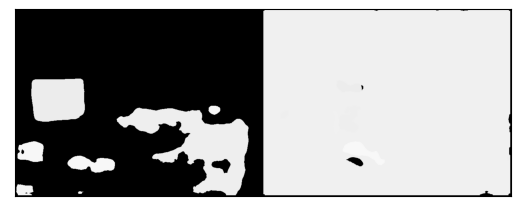

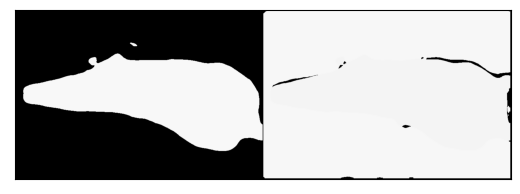

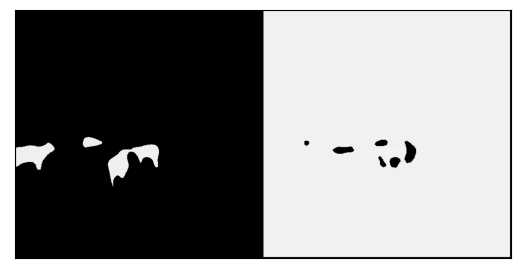

In [35]:

for idx in idxs:
    grid = make_grid([data['preds'][idx], data['adv_preds'][idx]])
    show(grid)

### Images with predictions applied (left - original, right - attacked)

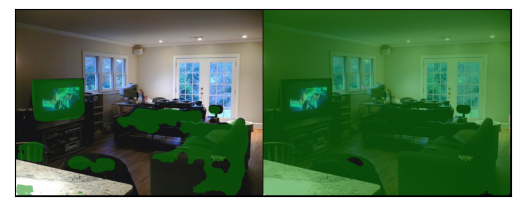

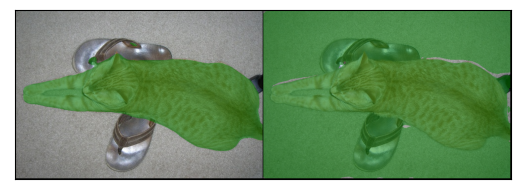

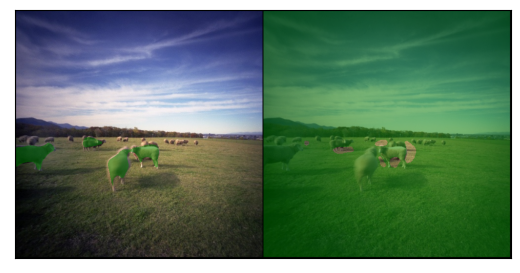

In [36]:
for i in range(len(data['preds'])):
    data['preds'][i] = data['preds'][i].to(bool)
    data['adv_preds'][i] = data['adv_preds'][i].to(bool)

for idx in idxs:
    imgs_with_masks = [
        draw_segmentation_masks(data['images'][idx], masks=data['preds'][idx],
        alpha=0.5, colors='green')
    ]

    adv_imgs_with_masks = [
        draw_segmentation_masks(data['adv_images'][idx], masks=data['adv_preds'][idx],
        alpha=0.5, colors='green')
    ]

    imgs_with_masks.extend(adv_imgs_with_masks)
    grid = make_grid(imgs_with_masks)
    show(grid)